# Inflation rate prediction model
This model takes federal fund rate as input to predict the future inflation rate

Data prepation

process data from CPIAUCSL.csv (the Customer price Index data form) and FEDFUNDS1955_01-2022_12.csv (the Federal Fund Rate data form), time ranged from 01/01/1955 to 12/01/2022

In [1]:
!pip install numpy
!pip install pandas
!pip install keras

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

View historical customer price index data from CPIAUCSL.csv

In [3]:
cpi_data = pd.read_csv('CPIAUCSL.csv')
cpi_data.head()
print(cpi_data['DATE'])
cpi_data.shape[1]

0      1953-01-01
1      1953-02-01
2      1953-03-01
3      1953-04-01
4      1953-05-01
          ...    
843    2023-04-01
844    2023-05-01
845    2023-06-01
846    2023-07-01
847    2023-08-01
Name: DATE, Length: 848, dtype: object


2

View historial federal fund rates from FEDFUNDS01_1955-12_2022.csv

In [4]:
FFER = pd.read_csv('FEDFUNDS01_1955-12_2022.csv')
FFER.head()
print(FFER['DATE'])
FFER.shape[1]

FFER.describe



0      1955-01-01
1      1955-02-01
2      1955-03-01
3      1955-04-01
4      1955-05-01
          ...    
811    2022-08-01
812    2022-09-01
813    2022-10-01
814    2022-11-01
815    2022-12-01
Name: DATE, Length: 816, dtype: object


<bound method NDFrame.describe of            DATE  FEDFUNDS
0    1955-01-01      1.39
1    1955-02-01      1.29
2    1955-03-01      1.35
3    1955-04-01      1.43
4    1955-05-01      1.43
..          ...       ...
811  2022-08-01      2.33
812  2022-09-01      2.56
813  2022-10-01      3.08
814  2022-11-01      3.78
815  2022-12-01      4.10

[816 rows x 2 columns]>

Calculate the percentage change of CPI index over 12 months

In [5]:
cpi_data['DATE'] = pd.to_datetime(cpi_data['DATE'])
inflation_rates = []


for year in range(1955, 2023): #Use data from 1955 to 2022
    for month in range(1, 13):
        # Calculate the date for the current month
        current_date = pd.Timestamp(year, month,1)
        
        
        # Calculate the date for the previous month
        previous_date = current_date - pd.DateOffset(months=12)
        
        # Get the CPI values for the current month and 12 months earlier.
        current_cpi = cpi_data[cpi_data['DATE'] == current_date]['CPIAUCSL'].values[0]
        previous_cpi = cpi_data[cpi_data['DATE'] == previous_date]['CPIAUCSL'].values[0]
        
        # Calculate the inflation rate for the current month and append to the list
        # Inflation rate = (current month's CPI - last year's CPI)/(last year's cpi)
        inflation_rate = ((current_cpi - previous_cpi) / previous_cpi) * 100
        inflation_rates.append((current_date, inflation_rate))
        #inflation_rates.append(inflation_rate)
        

# for month in range(1,9):
#     current_date = pd.Timestamp(2023,month,1)
#     previous_date = current_date - pd.DateOffset(months=12)
    
#     current_cpi = cpi_data[cpi_data['DATE'] == current_date]['CPIAUCSL'].values[0]
#     previous_cpi = cpi_data[cpi_data['DATE'] == previous_date]['CPIAUCSL'].values[0]
    
#     inflation_rate = ((current_cpi - previous_cpi) / previous_cpi) * 100
#     inflation_rates.append((current_date, inflation_rate))
    
        

# Create a DataFrame from the list of inflation rates
#inflation_df = pd.DataFrame(inflation_rates, columns=['Inflation Rate(%)'])
inflation_df = pd.DataFrame(inflation_rates, columns=['Inflat_date','Inflation Rate'])

# Print the DataFrame
print(inflation_df['Inflat_date'])
print(inflation_df['Inflation Rate'])
#print(inflation_rates)



0     1955-01-01
1     1955-02-01
2     1955-03-01
3     1955-04-01
4     1955-05-01
         ...    
811   2022-08-01
812   2022-09-01
813   2022-10-01
814   2022-11-01
815   2022-12-01
Name: Inflat_date, Length: 816, dtype: datetime64[ns]
0     -0.631032
1     -0.629863
2     -0.519866
3     -0.260611
4     -0.594133
         ...   
811    8.227361
812    8.214854
813    7.762493
814    7.135348
815    6.444940
Name: Inflation Rate, Length: 816, dtype: float64


Combine Federal fund rate and inflation rate into one single data frame

In [6]:
FFER_inflat = pd.concat([FFER,inflation_df],axis=1) # append new column
FFER_inflat.drop(columns=['Inflat_date'],axis=1,inplace=True)# drop a duplicate column
FFER_inflat['DATE'] = pd.to_datetime(FFER_inflat['DATE'])

# FFER_inflat.to_csv('FFER_with_inflat.csv',index=False)

# Data visulization

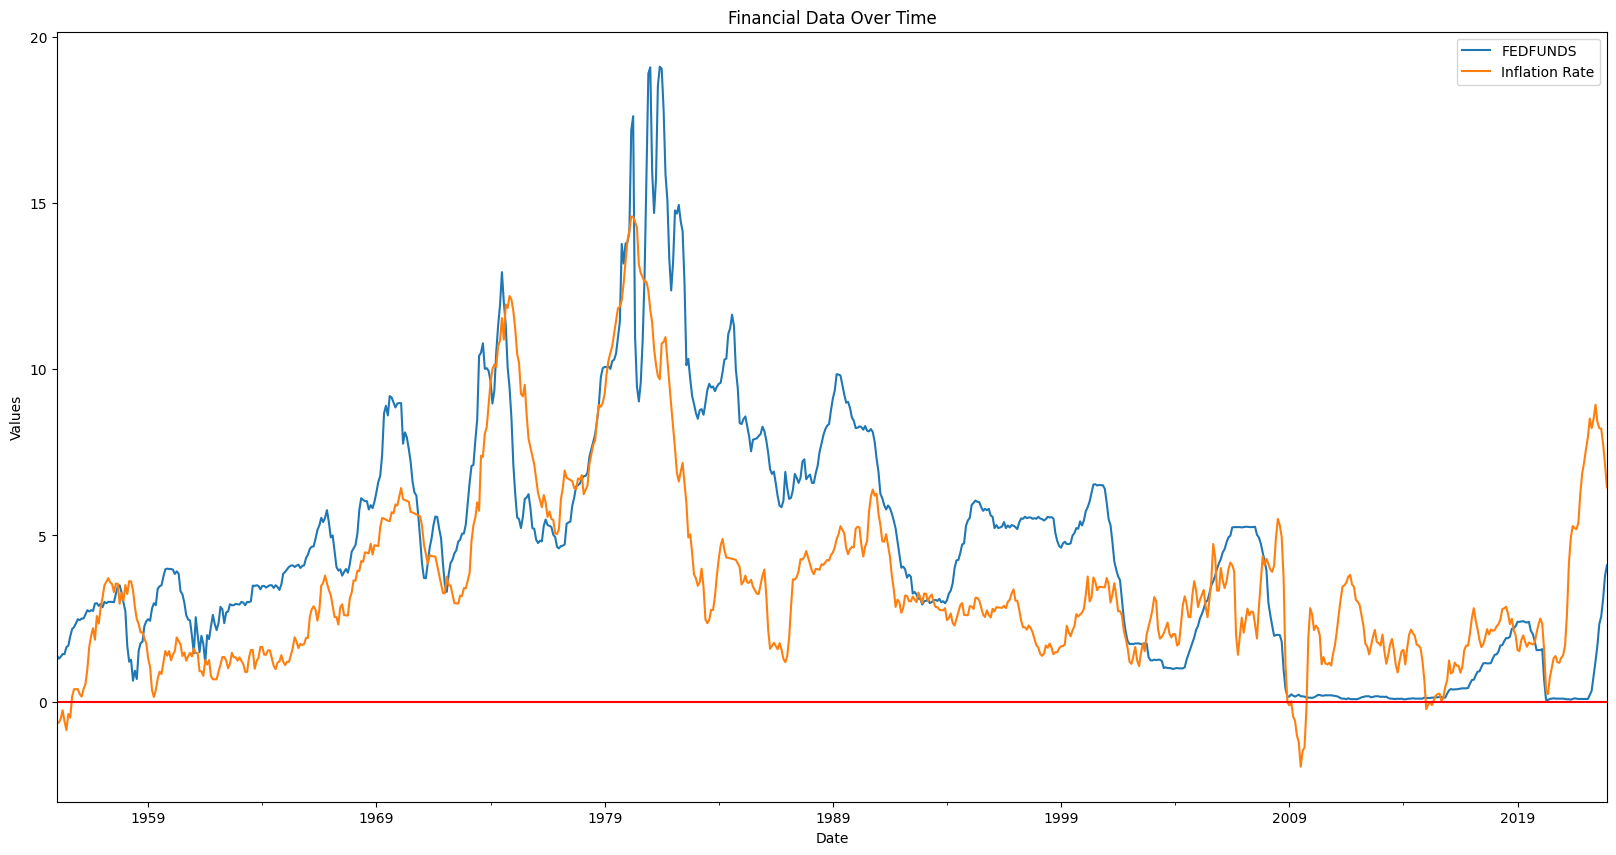

In [7]:
fig, ax = plt.subplots(figsize=(20,10))

FFER_inflat.plot(x='DATE',y='FEDFUNDS',kind='line',ax=ax)
FFER_inflat.plot(x='DATE',y='Inflation Rate',kind='line',ax=ax)

plt.axhline(0,color='red')
plt.title('Financial Data Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

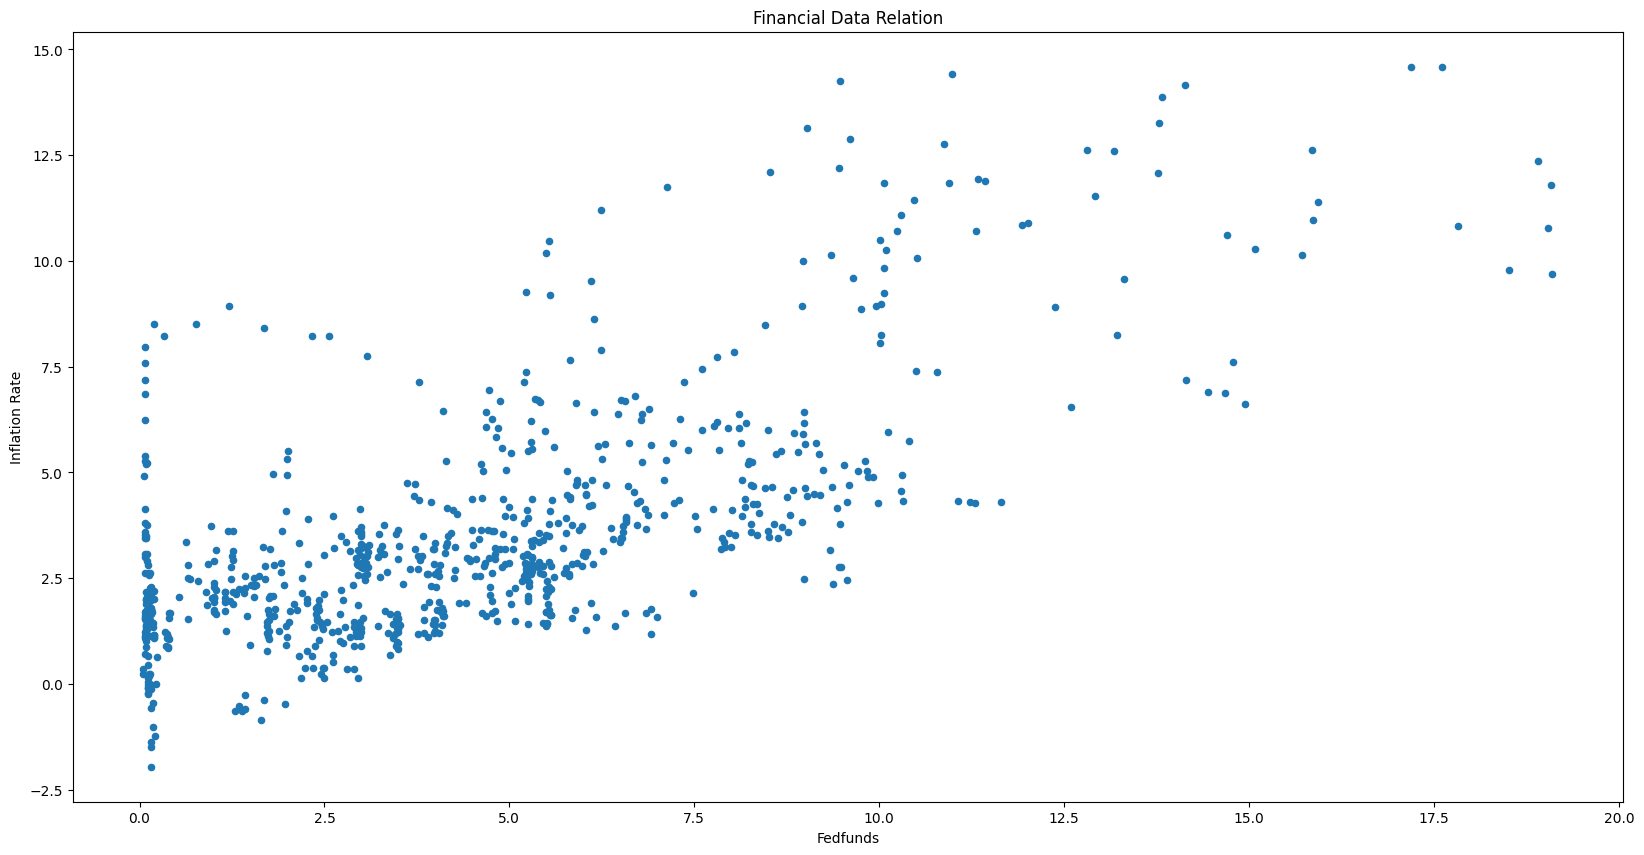

In [8]:
fig, ax = plt.subplots(figsize=(20,10))

FFER_inflat.plot(x='FEDFUNDS',y='Inflation Rate',kind='scatter',ax=ax)
plt.title('Financial Data Relation')
plt.xlabel('Fedfunds')
plt.ylabel('Inflation Rate')

# Show the plot
plt.show()

In [9]:
FFER_inflat.describe()

,DATE,FEDFUNDS,Inflation Rate
count,816,816.000000,816.000000
mean,1988-12-15 17:00:00,4.621875,3.611279
min,1955-01-01 00:00:00,0.050000,-1.958761
25%,1971-12-24 06:00:00,1.817500,1.702509
50%,1988-12-16 12:00:00,4.140000,2.897968
75%,2005-12-08 18:00:00,6.317500,4.467617
max,2022-12-01 00:00:00,19.100000,14.592275
std,NaN,3.618097,2.819831


In [10]:
FFER_inflat.shape

(816, 3)

Federal fund rates would be the predictor and inflation rate would be the target for the predition model

In [11]:
predictors = FFER_inflat['FEDFUNDS']
target = FFER_inflat['Inflation Rate']



In [12]:
predictors.head()

0    1.39
1    1.29
2    1.35
3    1.43
4    1.43
Name: FEDFUNDS, dtype: float64

In [13]:
target.head()

0   -0.631032
1   -0.629863
2   -0.519866
3   -0.260611
4   -0.594133
Name: Inflation Rate, dtype: float64

In [14]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

0   -0.893253
1   -0.920892
2   -0.904308
3   -0.882197
4   -0.882197
Name: FEDFUNDS, dtype: float64

# Build and train the model

In [15]:
import tensorflow as tf;
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

split train and test data by 70-30

In [16]:
x_train, x_test, y_train, y_test = train_test_split(predictors,target,test_size=0.3,random_state=42)

In [17]:
print(x_train)

323    12.37
132     4.42
382     6.04
265     4.68
444     4.03
       ...  
71      1.98
106     3.48
270     5.42
435     5.91
102     3.02
Name: FEDFUNDS, Length: 571, dtype: float64


Create a keras neural network model, only two hidden layers each with 128 neurons.

In [18]:
def regression_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(1,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss="mean_squared_error")
    return model

Build the regression model

In [19]:
model = regression_model()

Train the model

In [20]:
model.fit(x_train,y_train, epochs=500, verbose=1)

Epoch 1/500
18/18 [==============================] - 1s 1ms/step - loss: 7.4531
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 4.8760
Epoch 3/500
18/18 [==============================] - 0s 969us/step - loss: 4.3141
Epoch 4/500
18/18 [==============================] - 0s 1ms/step - loss: 4.2233
Epoch 5/500
18/18 [==============================] - 0s 1ms/step - loss: 4.1596
Epoch 6/500
18/18 [==============================] - 0s 993us/step - loss: 4.0970
Epoch 7/500
18/18 [==============================] - 0s 883us/step - loss: 4.0464
Epoch 8/500
18/18 [==============================] - 0s 933us/step - loss: 4.0290
Epoch 9/500
18/18 [==============================] - 0s 986us/step - loss: 4.0502
Epoch 10/500
18/18 [==============================] - 0s 989us/step - loss: 4.0515
Epoch 11/500
18/18 [==============================] - 0s 977us/step - loss: 3.9125
Epoch 12/500
18/18 [==============================] - 0s 1ms/step - loss: 3.9380
Epoch 13/500
18/18 [===

View model loss and train the model with the remaining test data. 

In [21]:
loss = model.evaluate(x_test, y_test)

model.fit(x_test,y_test, epochs=500, verbose=1)

8/8 [==============================] - 0s 960us/step - loss: 3.7245
Epoch 1/500
8/8 [==============================] - 0s 1ms/step - loss: 3.7277
Epoch 2/500
8/8 [==============================] - 0s 1ms/step - loss: 3.6916
Epoch 3/500
8/8 [==============================] - 0s 1ms/step - loss: 3.7014
Epoch 4/500
8/8 [==============================] - 0s 1ms/step - loss: 3.7108
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 3.6946
Epoch 6/500
8/8 [==============================] - 0s 1ms/step - loss: 3.7010
Epoch 7/500
8/8 [==============================] - 0s 1ms/step - loss: 3.7060
Epoch 8/500
8/8 [==============================] - 0s 1ms/step - loss: 3.6875
Epoch 9/500
8/8 [==============================] - 0s 1ms/step - loss: 3.6886
Epoch 10/500
8/8 [==============================] - 0s 1ms/step - loss: 3.6999
Epoch 11/500
8/8 [==============================] - 0s 1ms/step - loss: 3.6953
Epoch 12/500
8/8 [==============================] - 0s 1ms/step - loss: 

In [22]:
# FFER_latest = pd.read_csv('FEDFUNDS.csv')
# FFER_latest = FFER_latest[FFER_latest['DATE'].str.startswith('2023')]['FEDFUNDS']

# print(FFER_latest)

View the result of prediction

In [29]:
# The federal fund rate in September is 5.33
curr_rate = np.array([[5.33]])
prediction = model.predict(curr_rate)
print("The future inflation rate might be close to ", prediction)

1/1 [==============================] - 0s 15ms/step
The future inflation rate might be close to  [[3.1782923]]
